In [51]:
import local
import general
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First dataset exploration

In [52]:
# Choosing file to explore
csv_name = 'qualite-de-lair-mesuree-dans-la-station-auber.csv'
dataset_folder = 'RATP\\'
full_path = local.datasets_path + dataset_folder + csv_name

In [53]:
# Importing data Frame
ratp = pd.read_csv(full_path, sep=';')
ratp.head()

DATE/HEURE    NO   NO2   PM10  PM2.5    CO2  TEMP  HUMI
0  2013-04-06T08:00:00+02:00  39.0  54.0  265.0  102.0  462.0  17.8  42.8
1  2013-04-06T11:00:00+02:00  77.0  61.0  268.0  102.0  515.0  17.9  43.0
2  2013-04-06T12:00:00+02:00  62.0  62.0  272.0  100.0  517.0  18.0  42.8
3  2013-04-06T19:00:00+02:00  90.0  70.0  340.0  130.0  611.0  18.8  43.2
4  2013-04-07T08:00:00+02:00  19.0  51.0  182.0   79.0  451.0  17.5  42.0

In [54]:
#Making a first cleaning part
df = ratp.copy()
short = lambda x:x[:-6]
df['time'] = df['DATE/HEURE'].apply(short).apply(general.t.format_to_df_time)
del(df['DATE/HEURE'])
df.set_index('time', inplace=True)
df.head()

NO   NO2   PM10  PM2.5    CO2  TEMP  HUMI
time                                                            
2013-04-06 06:00:00  39.0  54.0  265.0  102.0  462.0  17.8  42.8
2013-04-06 09:00:00  77.0  61.0  268.0  102.0  515.0  17.9  43.0
2013-04-06 10:00:00  62.0  62.0  272.0  100.0  517.0  18.0  42.8
2013-04-06 17:00:00  90.0  70.0  340.0  130.0  611.0  18.8  43.2
2013-04-07 06:00:00  19.0  51.0  182.0   79.0  451.0  17.5  42.0

In [55]:
# Displaying global information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52198 entries, 2013-04-06 06:00:00 to 2018-12-17 00:00:00
Data columns (total 7 columns):
NO       43502 non-null float64
NO2      44122 non-null float64
PM10     45962 non-null float64
PM2.5    44744 non-null float64
CO2      44158 non-null float64
TEMP     47255 non-null float64
HUMI     47266 non-null float64
dtypes: float64(7)
memory usage: 3.0+ MB


In [56]:
# Displaying overview of values
df.describe()

NO           NO2          PM10         PM2.5           CO2  \
count  43502.000000  44122.000000  45962.000000  44744.000000  44158.000000   
mean      56.052848     53.206518    143.257865     62.242848    535.925540   
std       69.175808     29.529757    114.485244     49.227822    107.273196   
min        2.000000      6.000000      5.000000      2.000000    390.000000   
25%       16.000000     39.000000     72.000000     31.000000    451.000000   
50%       38.000000     50.000000    114.000000     50.000000    514.000000   
75%       73.000000     62.000000    182.000000     79.000000    591.000000   
max     1263.000000    931.000000   2584.000000    970.000000   1250.000000   

               TEMP          HUMI  
count  47255.000000  47266.000000  
mean      21.332767     44.201870  
std        3.851610      7.203966  
min        9.500000     19.000000  
25%       18.100000     39.200000  
50%       21.300000     44.200000  
75%       24.400000     49.200000  
max       32.600000     68.600000

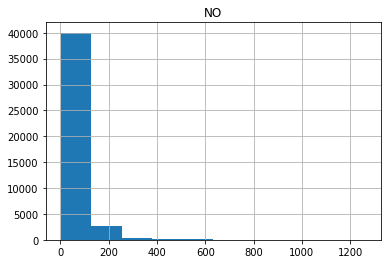

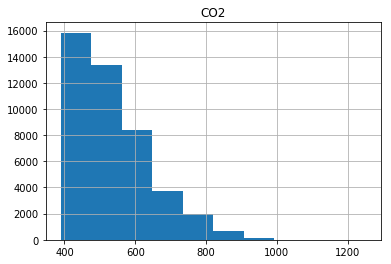

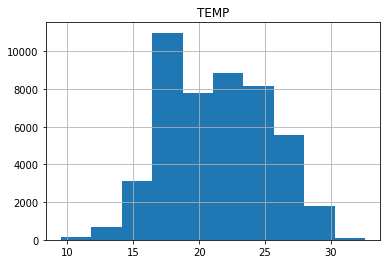

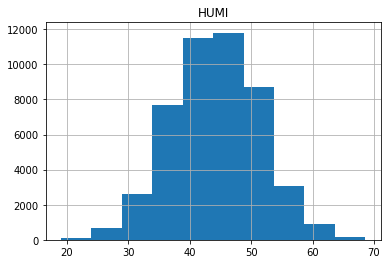

In [57]:
# Having abasic plot of each indicator
for i in df.columns:
    df[i].hist()
    plt.title(i)
    plt.show()

'HUMI'